In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
import statsmodels.formula.api as smf

import scipy.stats as ss

El objetivo de esta actividad es crear un modelo matemático que relaciona a la variables independientes X's con la variable dependiente "Y"  mediante una regresión lineal múltiple

In [2]:
data = pd.read_excel ("Regresion_lineal1.xlsx")
data.head()

,X1,X2,X3,X4,X5,Y
0,-1.353176,0.880374,0.599008,-1.220466,-0.066965,13.255195
1,-1.069595,0.686531,0.159624,0.242437,-0.053558,20.811412
2,1.516168,0.653783,-1.015517,0.887016,1.010497,104.803353
3,-0.759663,0.395897,0.103496,-1.522396,-0.569659,10.526006
4,0.098966,-1.154399,-0.738998,-0.868630,-0.609265,-107.056238


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      500 non-null    float64
 1   X2      500 non-null    float64
 2   X3      500 non-null    float64
 3   X4      500 non-null    float64
 4   X5      500 non-null    float64
 5   Y       500 non-null    float64
dtypes: float64(6)
memory usage: 23.6 KB


La variable de salida o variable dependiente es: Y

La variable de entrada o independiente es: X1, X2, X3, X4, X5

### Matriz de correlación

In [4]:
data.corr(numeric_only = True).iloc[:, -1].sort_values(ascending = False)

Y     1.000000
X2    0.738972
X1    0.562832
X3    0.375710
X4    0.026488
X5   -0.008494
Name: Y, dtype: float64

### Prueba y entrenamiento

In [5]:
data_en, data_pru = tts(data, test_size = 0.2)
data_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 433 to 212
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      400 non-null    float64
 1   X2      400 non-null    float64
 2   X3      400 non-null    float64
 3   X4      400 non-null    float64
 4   X5      400 non-null    float64
 5   Y       400 non-null    float64
dtypes: float64(6)
memory usage: 21.9 KB


In [6]:
data_pru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 57 to 301
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      100 non-null    float64
 1   X2      100 non-null    float64
 2   X3      100 non-null    float64
 3   X4      100 non-null    float64
 4   X5      100 non-null    float64
 5   Y       100 non-null    float64
dtypes: float64(6)
memory usage: 5.5 KB


### Hipótesis de la prueba

Hipótesis nula (H0): nuestro modelo lineal no describe el comportamiento de la variable dependiente (el coeficiente de determinación en realidad es cero).

Hipótesis alternativa (H1): nuestro modelo lineal realmente describe el comportamiento de la variable dependiente (el coeficiente de determinación en realidad es distinto de cero)

Usaremos el p-valor de corte  a 0.05, que nos da un 95% de confianza en la prueba. 
Regla de decisión: Si el p-valor de las variables independientes es menor que el valor 0.05 , (p < a) entonces se rechaza la hipótesis nula H0. Por lo tanto, el modelo es significativo.

### Regresión lineal simple

In [7]:
sl_model = smf.ols(formula = "Y ~ X2", data = data_en).fit() # modelo de regresión lineal
sl_model.summary() # tabla de resultados de la regresión

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     508.8
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           3.64e-73
Time:                        14:03:58   Log-Likelihood:                -2289.8
No. Observations:                 400   AIC:                             4584.
Df Residuals:                     398   BIC:                             4592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6940      3.726     -0.991      0.322     -11.019       3.631
X2            85.8005      3.804     22.556      0.000      78.322      93.279
==============================================================================
Omnibus:                        2.532   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                2.289
Skew:                           0.143   Prob(JB):                        0.318
Kurtosis:                       3.235   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Hallazgos de la regresión lineal simple:

Después de haber realizado la matriz de correlación se seleccionó la variable con mejor relación, esta relación se puede identificar en el apartado de R-squared. En este caso la variable independiente X2 nos dio un valor de 0.561 equivalente al 56.1%. Para comprobar que esta relación es confiable se confirmo en la variable P>|t|. Donde este número debe ser menor al 5%, como se puede observar en la gráfica esta relación cumplió este requisito.

### Residuos 1

Capturamos los residuos de la primer regresión lineal para posteriormente añadirlos a la data de entrenamiento.

In [8]:
influencia = sl_model.get_influence() # crear un objeto del tipo influencia
s_res = influencia.resid # creamos una variable con los residuos

In [9]:
data_en["Residuos"] = s_res # añadimos a la data de entrenamiento los residuos de la regresión lineal simple
data_en.head(3)

,X1,X2,X3,X4,X5,Y,Residuos
433,0.165321,-0.084675,-0.114928,-0.163238,-1.074286,13.624171,24.583316
324,-0.454258,0.507423,1.650334,-0.887976,0.255237,82.339414,42.496257
409,-0.668790,-1.032093,-1.366748,-1.434652,0.233768,-166.576028,-74.327955


In [10]:
data_en.corr(numeric_only = True)["Residuos"].sort_values(ascending = False)

Residuos    1.000000e+00
X1          7.914358e-01
Y           6.625123e-01
X3          5.688429e-01
X4          3.252960e-02
X2          1.394007e-16
X5         -4.787994e-02
Name: Residuos, dtype: float64

### Regresión multiple 1

Añadimos a la regresión la variable con mayor correlación hacia los residuos.

In [11]:
ml_model = smf.ols(formula = "Y~ X1 + X2", data = data_en).fit() # modelo de regresión lineal
ml_model.summary() # tabla de resultados de la regresión

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1037.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          2.51e-158
Time:                        14:03:58   Log-Likelihood:                -2088.9
No. Observations:                 400   AIC:                             4184.
Df Residuals:                     397   BIC:                             4196.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7783      2.260     -0.344      0.731      -5.222       3.665
X1            60.4006      2.304     26.216      0.000      55.871      64.930
X2            79.1960      2.318     34.160      0.000      74.638      83.754
==============================================================================
Omnibus:                        0.791   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.673   Jarque-Bera (JB):                0.574
Skew:                          -0.043   Prob(JB):                        0.751
Kurtosis:                       3.164   Cond. No.                         1.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En este apartado se obtuvieron los residuos. Donde después de haber obtenido estos mismos y agregar una columna extra, se busca que variable puede explicar de mejor manera estos residuos. Después de hacer esta observación se realiza la correlación de las variables y esta aumenta explicando aproximadamente el 80% de los datos. Se comprueba que esta relación no sea por azar en el apartado de P>|t|.

### Residuos 2

Capturamos los residuos de la regresión multiple.

In [12]:
influencia = ml_model.get_influence() # crear un objeto del tipo influencia
m_res = influencia.resid # creamos una variable con los residuos

In [13]:
data_en["Residuos"] = m_res # añadimos a la data de entrenamiento los residuos de la regresión lineal simple
data_en.corr(numeric_only = True)["Residuos"].sort_values(ascending = False)

Residuos    1.000000e+00
X3          8.828981e-01
Y           4.008854e-01
X4          4.640315e-02
X5          7.560098e-04
X2          1.821923e-15
X1          4.514429e-17
Name: Residuos, dtype: float64

### Regresión multiple 2

Añadimos a la regresión la variable con mayor correlación hacia los residuos.

In [14]:
ml_model = smf.ols(formula = "Y ~ X1 + X2 + X3", data = data_en).fit() # modelo de regresión lineal
ml_model.summary() # tabla de resultados de la regresión

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     3619.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          2.47e-287
Time:                        14:03:58   Log-Likelihood:                -1785.1
No. Observations:                 400   AIC:                             3578.
Df Residuals:                     396   BIC:                             3594.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6817      1.059     -1.588      0.113      -3.764       0.401
X1            58.6357      1.081     54.265      0.000      56.511      60.760
X2            79.6366      1.086     73.307      0.000      77.501      81.772
X3            39.2993      1.046     37.581      0.000      37.243      41.355
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.123
Skew:                          -0.009   Prob(JB):                        0.940
Kurtosis:                       2.916   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En este apartado se obtuvieron los residuos de nueva manera. Donde después de haber obtenido estos mismos y reemplazarlos por los anteriores, se busca que variable puede explicar de mejor manera estos. Después de hacer esta observación se realiza la correlación de las variables y esta aumenta explicando aproximadamente la mayoria de los datos, lo preferible es que este lo más pegado al 1. Se vuelve a comprobar que esta relación no sea por azar en el apartado de P>|t| que sea menor al 5%.

### Residuos 3

Capturamos los residuos de la regresión multiple.

In [15]:
influencia = ml_model.get_influence() # crear un objeto del tipo influencia
m_res = influencia.resid # creamos una variable con los residuos

In [16]:
data_en["Residuos"] = m_res # añadimos a la data de entrenamiento los residuos de la regresión lineal simple
data_en.corr(numeric_only = True)["Residuos"].sort_values(ascending = False)

Residuos    1.000000e+00
Y           1.875984e-01
X5          6.929740e-02
X4          5.697074e-02
X2          1.714816e-15
X3          1.098478e-16
X1         -8.376560e-16
Name: Residuos, dtype: float64

### Regresión múltiple 3

Añadimos a la regresión la variable con mayor correlación hacia los residuos para revisar si vale la pena seguir incluyendo nuevas variables a la regresión.

In [17]:
ml_model = smf.ols(formula = "Y ~ X1 + X2 + X3 + X5", data = data_en).fit() # modelo de regresión lineal
ml_model.summary() # tabla de resultados de la regresión

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     2721.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          6.21e-286
Time:                        14:03:58   Log-Likelihood:                -1784.1
No. Observations:                 400   AIC:                             3578.
Df Residuals:                     395   BIC:                             3598.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7311      1.059     -1.635      0.103      -3.812       0.350
X1            58.7242      1.081     54.314      0.000      56.599      60.850
X2            79.6113      1.085     73.358      0.000      77.478      81.745
X3            39.3513      1.045     37.650      0.000      37.296      41.406
X5             1.4751      1.066      1.384      0.167      -0.620       3.570
==============================================================================
Omnibus:                        0.131   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.245
Skew:                          -0.003   Prob(JB):                        0.885
Kurtosis:                       2.879   Cond. No.                         1.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En este apartado se obtuvieron los residuos de nueva manera. Donde se busca otra variable que aumente el R-Squared. Sin embargo después de agregar la variable X5 podemos observar que el valor R-Squared no tiene un aumento notable y por otra parte el valor P > |t| esta cerca de llegar al 5%. Es por esto que decidimos retirar la variable del modelo para evitar posibles errores futuros.

### Modelo real

In [18]:
ml_model = smf.ols(formula = "Y ~  X2  + X3 + X1", data = data_en).fit() # modelo de regresión lineal
ml_model.summary() # tabla de resultados de la regresión

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     3619.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          2.47e-287
Time:                        14:03:58   Log-Likelihood:                -1785.1
No. Observations:                 400   AIC:                             3578.
Df Residuals:                     396   BIC:                             3594.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6817      1.059     -1.588      0.113      -3.764       0.401
X2            79.6366      1.086     73.307      0.000      77.501      81.772
X3            39.2993      1.046     37.581      0.000      37.243      41.355
X1            58.6357      1.081     54.265      0.000      56.511      60.760
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.123
Skew:                          -0.009   Prob(JB):                        0.940
Kurtosis:                       2.916   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finalmente obtuvimos nuestro modelo final, una regresión multiple con tres variables independientes X1, X2 y X3, modelo que cuenta con un valor de R-squared de 0.965 o 96.5% y con un valor de P menor al 5% el cual nos asegura que el valor de R-squared no fue obtenido por azar.

### Gráficos de residuos

In [19]:
influencia = ml_model.get_influence() # crear un objeto del tipo influencia
m_res = influencia.resid # creamos una variable con los residuos

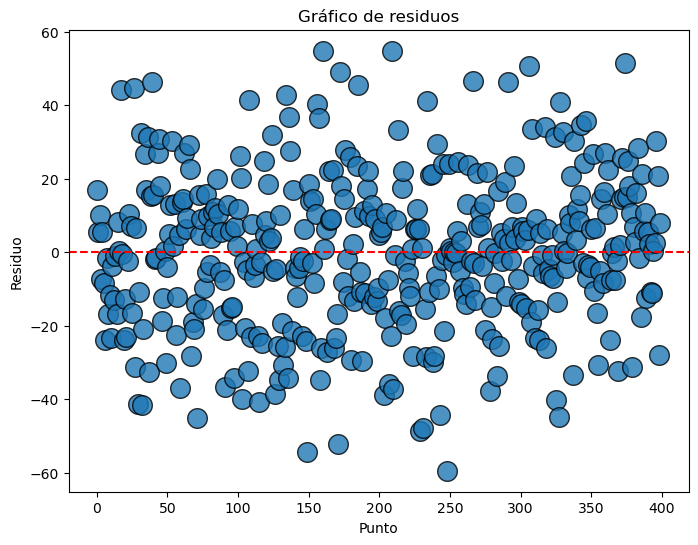

In [20]:
plt.figure(figsize = (8,6))

plt.scatter(np.arange(len(data_en)), m_res, s = 200, alpha = 0.8, ec = "black")
plt.axhline(0, c = "red", linestyle = "--")
plt.title("Gráfico de residuos")
plt.xlabel("Punto")
plt.ylabel("Residuo")

plt.show()

Con el gráfico podemos observar los residuos de nuestro modelo y descartar posibles errores, al observar este gráfico vemos que los valores son homocedásticos,lo que quiere decir que la varianza de nuestros errores es constante. Además estos valores no estan correlacionados y son simétricos.

In [21]:
std_res = influencia.resid_studentized # creamos una variable con los residuos

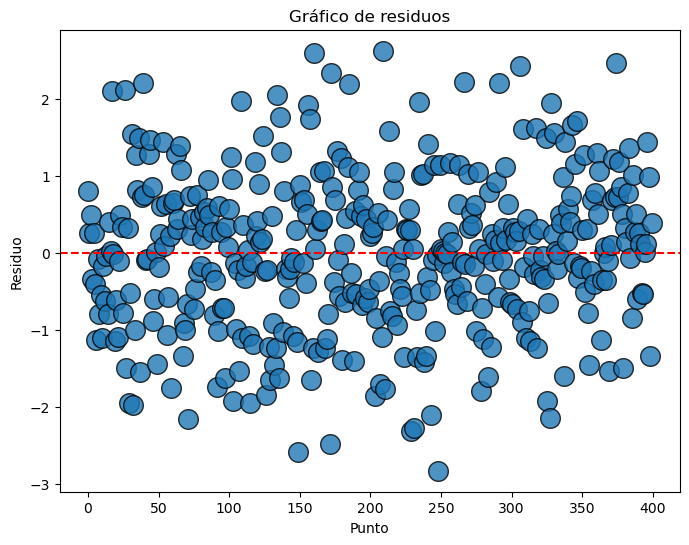

In [22]:
plt.figure(figsize = (8,6))

plt.scatter(np.arange(len(data_en)), std_res, s = 200, alpha = 0.8, ec = "black")
plt.axhline(0, c = "red", linestyle = "--")
plt.title("Gráfico de residuos")
plt.xlabel("Punto")
plt.ylabel("Residuo")

plt.show()

Finalmente estadarizamos los residuos para escalarlos y eliminar posibles valores atípicos, como se puede observar no existen valores considerados como atípicos en nuestros residuos.

Conclusión

Después de obtener el modelo de regresión multiple, los gráficos y los valores R-squared y P podemos concluir en que nuestro proyecto describe el comportamiento de la variable dependiente con las variables independientes X1, X2 y X3, con un porcentaje de confianza del 95% ya que en los modelos el valor P no pasa de 5  